In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan%20/Regression/master/Startups_Data.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


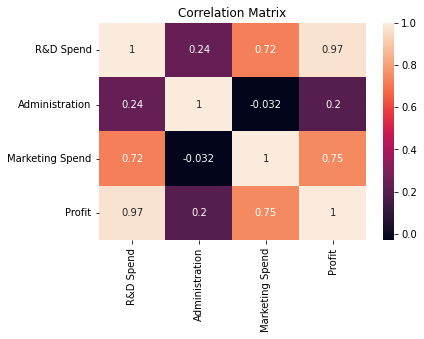

In [ ]:
sns.heatmap(data = data.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

Administration - 0.2 correlation with profit - drop
correlation between r&d spend and marketing spend = 0.72 - high correlation - drop 1
r&d spend - 0.97 correlation with profit
marketing spend - 0.75 correlation with profit
drop marketing spend

In [ ]:
data = data.drop(['Administration', 'Marketing Spend'], axis = 1)

In [ ]:
data.head(100)

,R&D Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94
5,131876.90,New York,156991.12
6,134615.46,California,156122.51
7,130298.13,Florida,155752.60
8,120542.52,New York,152211.77
9,123334.88,California,149759.96


In [ ]:
y = data['Profit']
data['New York'] = np.where(data['State'] == "New York", 1, 0)
data['California'] = np.where(data['State'] == "California", 1, 0)
data['Florida'] = np.where(data['State'] == "Florida", 1, 0)
data = data.drop(['State', 'Profit'], axis = 1)
data = pd.concat([data, y], axis = 1)
data.head()

,R&D Spend,New York,California,Florida,Profit
0,165349.20,1,0,0,192261.83
1,162597.70,0,1,0,191792.06
2,153441.51,0,0,1,191050.39
3,144372.41,1,0,0,182901.99
4,142107.34,0,0,1,166187.94


In [ ]:
X = data.drop('Profit', axis = 1)
y = data['Profit']
normalizer = MinMaxScaler()
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns, index = X.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [ ]:
class LinearRegression:
  def __init__(self, feature_cnt):
    self.bias = 0
    self.theta = np.zeros(feature_cnt)
  
  def predict(self, X):
    return np.array(self.bias + np.dot(X, self.theta))

  def update(self, X, y, y_pred, alpha):
    self.bias = self.bias - (alpha * ((2 / len(y)) * (np.sum(y_pred - y))))
    self.theta = self.theta - (alpha * ((2 / len(y)) * (np.dot((y_pred - y), X))))

  def fit(self, X, y, iter, alpha):
    loss = []
    for i in range(iter):
      y_pred = self.predict(X)
      self.update(X, y, y_pred, alpha)
      loss.append(mean_squared_error(y, y_pred))
    return loss

<function matplotlib.pyplot.show>

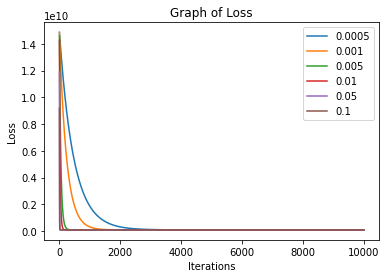

In [ ]:
losses = []
for alpha in [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]:
  model = LinearRegression(X.shape[1])
  loss = model.fit(X_train, y_train, 10000, alpha)
  losses.append([alpha, loss])
for i in range(len(losses)):
  plt.plot(np.arange(1, 10000), losses[i][1][1:], label = losses[i][0])
plt.title("Graph of Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show

In [ ]:
model = LinearRegression(X.shape[1])
loss = model.fit(X_train, y_train, 10000, 0.1)

In [ ]:
print("Bias:")
print(model.bias)
print("Theta:")
print(model.theta)

Bias:
111278.41111532411
Theta:
[ 3.90630947e+04  3.62134807e+00 -2.10825931e+02  2.10417249e+02]


In [ ]:
y_pred = model.predict(X_test)
res = pd.DataFrame({'Predicted': y_pred, 'Ground Truth': y_test})
res.head(10)

,Predicted,Ground Truth
41,72337.415248,77798.83
20,113014.564721,118474.03
32,101972.413713,97427.84
43,61245.385125,69758.98
10,135968.538982,146121.95
29,104313.427552,101004.64
33,96064.526283,96778.92
25,103051.999960,107404.34
34,87373.228682,96712.80
19,122206.285501,122776.86


In [ ]:
mean_squared_error(y_test, y_pred)

37381346.037771195

In [ ]:
r2_score(y_test, y_pred)

0.9142822746868629

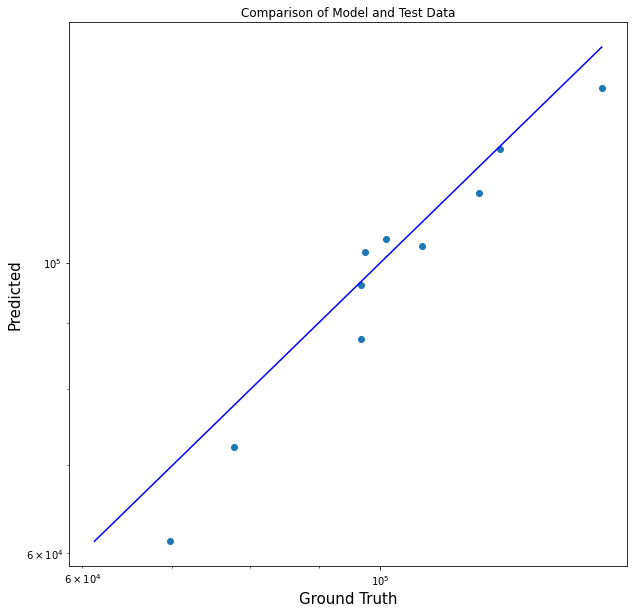

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Comparison of Model and Test Data")
plt.xlabel('Ground Truth', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.show()